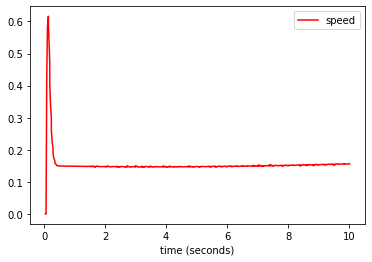

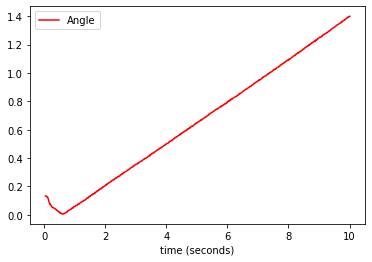

In [1]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.utils.time import *

dps = DataPlotter()
dps.set_x("time (seconds)")
dps.add_y("speed", "speed")

dpa = DataPlotter()
dpa.set_x("time (seconds)")
dpa.add_y("angle", "Angle")

dds = DDS()
dds.start()

dds.subscribe(['speed','angle'])
dds.publish('torque', 0.9, DDS.DDS_TYPE_FLOAT)

t = Time()
t.start()
while t.get() < 10:
    
    v = dds.wait('speed')
    p = dds.read('angle')
    
    delta_t = t.elapsed()

    dps.append_x(t.get())
    dps.append_y("speed", v)
    
    dpa.append_x(t.get())
    dpa.append_y("angle", p)

dds.publish('torque', 0.0, DDS.DDS_TYPE_FLOAT)

dps.plot()
dpa.plot()

dds.stop()

